# Corpus Analysis

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import textwrap


In [2]:
df = pd.read_csv("./data/datasetStereotype.csv")
df

,id,annotatore,tweet,chunk,annotazione,annotazioni_parsate,cluster_10_marem,cluster_5_marem,cluster_10_nome_marem,cluster_5_nome_marem,...,stereotype,intensity,offensiveness,aggressiveness,irony,sarcasm,agent,patient,cluster_10_nome_ale,cluster_5_nome_ale
0,_1039886625994694656,annotatore_05,L'immigrato che non piace alla sinistra razzis...,migranti che non lavorano ma delinquono,i migranti non vogliono lavorare,non lavorare,5.0,2.0,SonoPigri,SonoSfruttatori,...,1.0,NaN,NaN,1.0,0.0,0.0,immigrati,NaN,SonoFannulloni,FannoQuelloCheVoglionoSenzaContribuire
1,_1039886625994694656,annotatore_05,L'immigrato che non piace alla sinistra razzis...,migranti che non lavorano ma delinquono,i migranti sono criminali,sono criminali,1.0,1.0,SonoPericolosi,SonoMinaccia,...,1.0,NaN,NaN,1.0,0.0,0.0,immigrati,NaN,SonoCriminali,SonoPericolosi
2,_1039886625994694656,annotatore_02,L'immigrato che non piace alla sinistra razzis...,migranti che non lavorano,gli immigrati non lavorano,non lavorano,5.0,2.0,SonoPigri,SonoSfruttatori,...,1.0,NaN,NaN,1.0,0.0,0.0,immigrati,NaN,SonoFannulloni,FannoQuelloCheVoglionoSenzaContribuire
3,_1039886625994694656,annotatore_02,L'immigrato che non piace alla sinistra razzis...,migranti delinquono,gli immigrati sono delinquenti,sono delinquenti,1.0,1.0,SonoPericolosi,SonoMinaccia,...,1.0,NaN,NaN,1.0,0.0,0.0,immigrati,NaN,SonoCriminali,SonoPericolosi
4,_1039910346432147456,annotatore_05,@AFoccardi @SoniaGrotto ... ma tutti i psicola...,non sanno reprimere i loro istinti,gli stranieri sono animali,sono animali,7.0,4.0,SonoSelvaggi,RovinanoItalia,...,1.0,NaN,NaN,1.0,0.0,0.0,minoranza_etnica,NaN,SonoPericolosi,SonoPericolosi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,_titoli-cri-297,annotatore_05,Finanzia l'invasione degli immigrati: ecco la ...,l'invasione degli immigrati,i migranti vogliono invadere l'Italia,invadere italia,4.0,2.0,SonoInvasori,SonoSfruttatori,...,1.0,NaN,NaN,0.0,0.0,0.0,immigrati,NaN,Ci_Invadono,PeggioranoLeNostreCondizioniDiVita
3574,_titoli-cri-297,annotatore_01,Finanzia l'invasione degli immigrati: ecco la ...,Finanzia l'invasione degli immigrati George So...,le ong favoriscono l'immigrazione,favoriscono immigrazione,10.0,5.0,SonoTutelati,SonoTutelati,...,1.0,NaN,NaN,0.0,0.0,0.0,attivisti,NaN,Ci_Invadono,PeggioranoLeNostreCondizioniDiVita
3575,_titoli-cri-297,annotatore_01,Finanzia l'invasione degli immigrati: ecco la ...,Finanzia l'invasione degli immigrati George So...,gli immigrati sono invasori,sono invasori,4.0,2.0,SonoInvasori,SonoSfruttatori,...,1.0,NaN,NaN,0.0,0.0,0.0,immigrati,NaN,Ci_Invadono,PeggioranoLeNostreCondizioniDiVita
3576,_titoli-cri-554,annotatore_05,"Immigrazione, Viminale: 500 euro a testa ai 13...",500 euro a testa ai 13mila profughi per farli ...,i migranti sono parassiti,sono parassiti,2.0,2.0,SonoParassiti,SonoSfruttatori,...,1.0,NaN,NaN,0.0,0.0,0.0,NaN,immigrati,Ci_Invadono,PeggioranoLeNostreCondizioniDiVita


In [28]:
df["annotazione"].value_counts()

annotazione
i rom sono ladri                                                   109
i migranti sono parassiti                                           65
i rom sono una categoria omogenea di individui                      42
i migranti non sono profughi                                        35
 tutti i rom sono nomadi                                            33
                                                                  ... 
gli immigrati vengono in italia per delinquere                       1
l'immigrazione è una piaga                                           1
gli immigrati sono degli stupratori assassini                        1
gli immigrati non possono essere integrati nella nostra società      1
i rom vanno puniti severamente                                       1
Name: count, Length: 1547, dtype: int64

## General statistics

In [3]:
# Information about the dataset
print("Number of annotations:", df.shape)
print("Number of texts:",len(set(df["id"].tolist())))
print()
print("Number of rationales: ", len(set(df["annotazione"].tolist())))
print()
print("Number of annotations per annotator")
print(df["annotatore"].value_counts())
print()

print("Number of texts annotated by each annotator")
texts_per_annotator = df.groupby(["annotatore", "id"]).size().reset_index(name='text_count')
annotator_summary = texts_per_annotator.groupby("annotatore").size()
annotator_summary

Number of annotations: (3578, 34)
Number of texts: 1022

Number of rationales:  1547

Number of annotations per annotator
annotatore
annotatore_05    1792
annotatore_01    1367
annotatore_04     178
annotatore_03     129
annotatore_02     112
Name: count, dtype: int64

Number of texts annotated by each annotator


annotatore
annotatore_01     747
annotatore_02      75
annotatore_03     100
annotatore_04      94
annotatore_05    1001
dtype: int64

In [4]:
df_no_dup = df.drop_duplicates(subset=["id", "annotatore"])

id_counts = df_no_dup["id"].value_counts()
num_ids_with_one_occurrence = (id_counts == 1).sum()
print("Number of IDs that occur exactly once:", num_ids_with_one_occurrence)

Number of IDs that occur exactly once: 27


In [5]:
count_ann_text = df.groupby(["annotatore", "id"])["annotazione"].size()
print("Mean on annotations for (annotatore,id)", count_ann_text.mean())

count_ann_text.groupby("annotatore").mean()
# count_ann_text = df.groupby(["annotatore", "id"]).agg(count=("annotazione", "count"))

Mean on annotations for (annotatore,id) 1.773921665840357


annotatore
annotatore_01    1.829987
annotatore_02    1.493333
annotatore_03    1.290000
annotatore_04    1.893617
annotatore_05    1.790210
Name: annotazione, dtype: float64

## Agents and patients

In [6]:
print("AGENT and PATIENT")

print(df["agent"].value_counts())
print()
print(df["patient"].value_counts())

AGENT and PATIENT
agent
immigrati           1293
rom_sinti            893
mussulmani           382
minoranza_etnica     212
sinistra              88
italiani              34
attivisti             33
istituzioni           30
giornalisti           19
persone               12
bambini               10
cristiani              8
terroristi             7
donne                  7
uomini                 4
ebrei                  3
mafiosi                3
figli                  2
altri_stati            2
destra                 2
giudici                2
società                1
scuola                 1
calciatori             1
europa                 1
attori                 1
aziende                1
imprenditori           1
professionisti         1
Name: count, dtype: int64

patient
immigrati           217
rom_sinti            32
mussulmani           27
minoranza_etnica      7
donne                 6
italiani              4
persone               2
barboni               1
uomini                1


In [30]:
print("Number of agents: ", len(df["agent"].dropna().drop_duplicates().tolist()))
print("Mumber of patient: ", len(df["patient"].dropna().drop_duplicates().tolist()))

Number of agents:  29
Mumber of patient:  11


In [ ]:
list_annotators = ["annotatore_01", "annotatore_02", "annotatore_03", "annotatore_04", "annotatore_05"]
dict_agent_pat = {}

for a in list_annotators:
    df_a = df[df["annotatore"] == a]
    # print(df_a.shape)
    num_agents = len(df_a["agent"].dropna().tolist())
    num_patients = len(df_a["patient"].dropna().tolist())
    dict_agent_pat[a] = {"count_agent": num_agents, "count_patient":num_patients}
print(dict_agent_pat)

count_agent_pat = pd.DataFrame.from_dict(dict_agent_pat, orient='index').reset_index()
count_agent_pat.rename(columns={'index': 'annotatore'}, inplace=True)

agent_ann = df.groupby(["agent", "annotatore"]).size().reset_index(name='text_count')
agent_ann = agent_ann.merge(count_agent_pat[["annotatore", "count_agent"]], on='annotatore', how='left')

agent_ann["percentage"] = agent_ann["text_count"] / agent_ann["count_agent"]
agent_ann["percentage_str"] = (agent_ann["percentage"] * 100).round(2)
agent_ann.to_csv("./saved_for_analysis/agents.csv")


pat_ann = df.groupby(["patient", "annotatore"]).size().reset_index(name='text_count')
pat_ann = pat_ann.merge(count_agent_pat[["annotatore", "count_patient"]], on='annotatore', how='left')

pat_ann["percentage"] = pat_ann["text_count"] / pat_ann["count_patient"]
pat_ann["percentage_str"] = (pat_ann["percentage"] * 100).round(2)
pat_ann.to_csv("./saved_for_analysis/patients.csv")

{'annotatore_01': {'count_agent': 1202, 'count_patient': 145}, 'annotatore_02': {'count_agent': 90, 'count_patient': 7}, 'annotatore_03': {'count_agent': 110, 'count_patient': 12}, 'annotatore_04': {'count_agent': 157, 'count_patient': 10}, 'annotatore_05': {'count_agent': 1495, 'count_patient': 125}}


In [9]:
#compute threshold
print("AGENT threshold")
print((agent_ann.groupby("annotatore")["percentage_str"].mean()))
print()
print("PATIENT threshold")
print((pat_ann.groupby("annotatore")["percentage_str"].mean()))

AGENT threshold
annotatore
annotatore_01     4.165417
annotatore_02     9.999000
annotatore_03    33.333333
annotatore_04     9.091818
annotatore_05     6.666000
Name: percentage_str, dtype: float64

PATIENT threshold
annotatore
annotatore_01    16.666667
annotatore_02    33.333333
annotatore_03    50.000000
annotatore_04    20.000000
annotatore_05    14.285714
Name: percentage_str, dtype: float64


## Cluster distribution

### 10

In [92]:
# df_cluster = df.dropna(subset=["cluster_10_marem"])
# df_cluster = df_cluster[df_cluster["cluster_10_nome_ale"] !='None/Doubt']
df_cluster = df[df["cluster_10_nome_ale"] !='X']

df_cluster.shape

(3250, 34)

In [11]:
print("DISTRIBUTION OF CLUSTERS ACROSS CORPUS - 10")
print()
print(df_cluster["cluster_10_nome_marem"].value_counts())
print()
print(df_cluster["cluster_10_nome_marco"].value_counts())
print()
print(df_cluster["cluster_10_nome_ale"].value_counts())

DISTRIBUTION OF CLUSTERS ACROSS CORPUS - 10

cluster_10_nome_marem
SonoPericolosi             892
SonoParassiti              536
SonoInvasori               463
SonoTutelati               328
SonoSelvaggi               208
SonoEstremistiReligiosi    165
SonoInferiori              137
MaltrattanoDeboli          116
PortanoDegrado             115
SonoPigri                   73
Name: count, dtype: int64

cluster_10_nome_marco
SonoPericolosi             651
SonoFardello               619
SonoDelinquenti            514
SonoProblema               298
SonoPrivilegiati           264
SonoIncivili               261
SonoEstremistiReligiosi    202
MaltrattanoDeboli          178
PortanoDegrado             131
IngannanoAltri             121
Name: count, dtype: int64

cluster_10_nome_ale
SonoCriminali                            800
SonoPericolosi                           537
Ci_Invadono                              458
FannoQuelloCheVogliono/PretendonoCose    387
SonoDiversiDaNoi                     

In [12]:
list_cl_marem = df_cluster["cluster_10_nome_marem"].tolist()
list_cl_ale = df_cluster["cluster_10_nome_ale"].tolist()
list_cl_marco = df_cluster["cluster_10_nome_marco"].tolist()

In [13]:
distr_10_marem = df_cluster.groupby(["cluster_10_nome_marem", "annotazioni_parsate"]).size().reset_index(name='count')
distr_10_ale = df_cluster.groupby(["cluster_10_nome_ale", "annotazioni_parsate"]).size().reset_index(name='count')
distr_10_marco = df_cluster.groupby(["cluster_10_nome_marco", "annotazioni_parsate"]).size().reset_index(name='count')

distr_10_marem.to_csv("./saved_for_analysis/distr_10_marem.csv", index=False)
distr_10_ale.to_csv("./saved_for_analysis/distr_10_ale.csv", index=False)
distr_10_marco.to_csv("./saved_for_analysis/distr_10_marco.csv", index=False)

### 5

In [14]:
print("DISTRIBUTION OF CLUSTERS ACROSS CORPUS - 5")
print()
print(df["cluster_5_nome_marem"].value_counts())
print()
print(df["cluster_5_nome_marco"].value_counts())
print()
print(df["cluster_5_nome_ale"].value_counts())

DISTRIBUTION OF CLUSTERS ACROSS CORPUS - 5

cluster_5_nome_marem
SonoSfruttatori            1072
SonoMinaccia               1008
RovinanoItalia              460
SonoTutelati                328
SonoEstremistiReligiosi     165
Name: count, dtype: int64

cluster_5_nome_marco
SonoParassiti              883
SonoIncompatibiliConNoi    853
SonoSubdoli                635
SonoImmorali               570
SonoProblema               298
Name: count, dtype: int64

cluster_5_nome_ale
SonoPericolosi                            1337
PeggioranoLeNostreCondizioniDiVita         710
FannoQuelloCheVoglionoSenzaContribuire     449
HannoCulturaDiversaDallaNostra             438
X                                          328
None/Doubt                                 159
PortanoDegrado                             157
Name: count, dtype: int64


In [15]:
distr_5_marem = df_cluster.groupby(["cluster_5_nome_marem", "annotazioni_parsate"]).size().reset_index(name='count')
distr_5_ale = df_cluster.groupby(["cluster_5_nome_ale", "annotazioni_parsate"]).size().reset_index(name='count')
distr_5_marco = df_cluster.groupby(["cluster_5_nome_marco", "annotazioni_parsate"]).size().reset_index(name='count')

distr_5_marem.to_csv("./saved_for_analysis/distr_5_marem.csv", index=False)
distr_5_ale.to_csv("./saved_for_analysis/distr_5_ale.csv", index=False)
distr_5_marco.to_csv("./saved_for_analysis/distr_5_marco.csv", index=False)

## Differences hateful comments vs non hateful comments

In [93]:
df_cluster_en = df_cluster.copy()

dict_english_cl = {
        "cluster_5_nome_marco":{
            'SonoParassiti': "Parasites", 
            'SonoSubdoli': "Subtle", 
            'SonoImmorali': "Immoral",
            'SonoIncompatibiliConNoi': "Incompatible", 
            'SonoProblema': "Problem"
            }, 
       "cluster_5_nome_ale": {
           "FannoQuelloCheVoglionoSenzaContribuire": "Do not contribute",
            "SonoPericolosi": "Dangerous",
            "PeggioranoLeNostreCondizioniDiVita": "Worsen our lives",
            "HannoCulturaDiversaDallaNostra": "Different culture",
            "PortanoDegrado": "Degraded"
            }, 
       "cluster_5_nome_marem": {
           "SonoSfruttatori": "Exploiters",
            "SonoMinaccia": "Threat",
            "RovinanoItalia": "Ruin Italy",
            "SonoTutelati": "Protected",
            "SonoEstremistiReligiosi": "Radicalized"
            }
            }

for col_name, d in dict_english_cl.items():
    df_cluster_en.loc[:, col_name] = df_cluster[col_name].map(d)
    
# print(df_cluster["cluster_5_nome_marco"].value_counts())
# print(df_cluster_en["cluster_5_nome_marco"].value_counts())

df_cluster_en["hs"] = df_cluster_en["hs"].map({1:"hs", 0:"not hs"})

/tmp/ipykernel_6806/1009371118.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


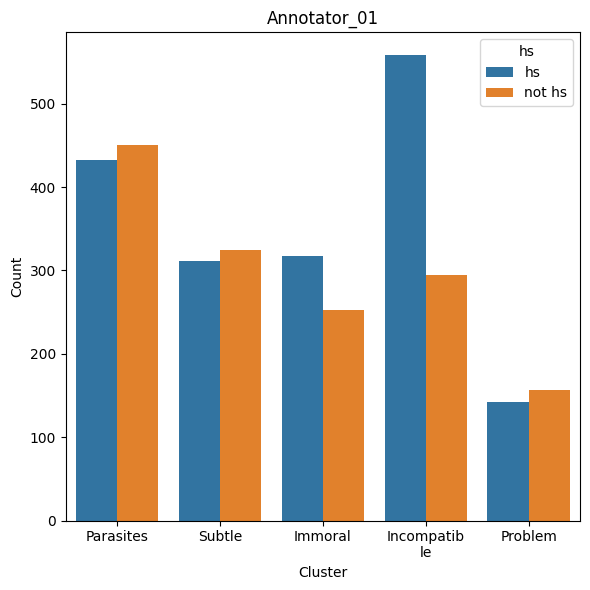

In [94]:

plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df_cluster_en, x='cluster_5_nome_marco', hue='hs')

# Wrap x-tick labels
labels = [textwrap.fill(label.get_text(), width=10) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.title('Annotator_01')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='hs')
plt.tight_layout()
plt.savefig("./saved_for_analysis/hs_a1.png")
plt.show()


/tmp/ipykernel_6806/1500245615.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


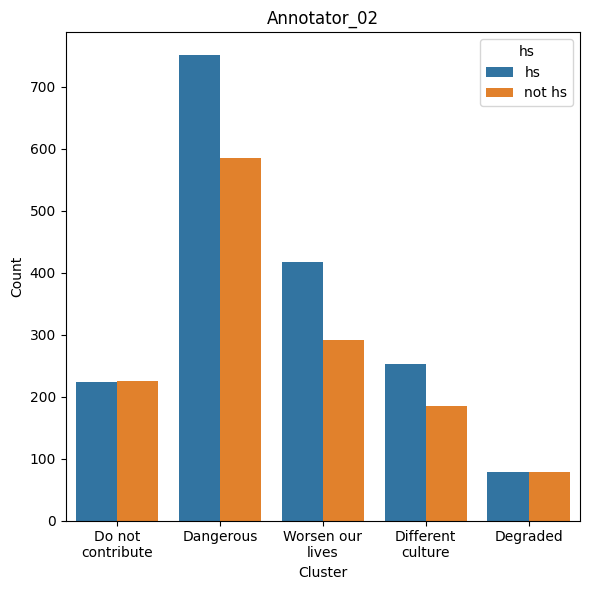

In [95]:

plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df_cluster_en, x='cluster_5_nome_ale', hue='hs')

# Wrap x-tick labels
labels = [textwrap.fill(label.get_text(), width=10) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)

plt.title('Annotator_02')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='hs')
plt.tight_layout()
plt.savefig("./saved_for_analysis/hs_a2.png")
plt.show()


In [106]:
df_cluster_en.groupby(["cluster_5_nome_marem", "hs"]).size()

cluster_5_nome_marem  hs    
Exploiters            hs        614
                      not hs    458
Protected             hs        147
                      not hs    181
Radicalized           hs        124
                      not hs     41
Ruin Italy            hs        258
                      not hs    201
Threat                hs        542
                      not hs    465
dtype: int64

In [ ]:
df_cluster_en["hs"].value_counts()

hs
hs        1769
not hs    1479
Name: count, dtype: int64

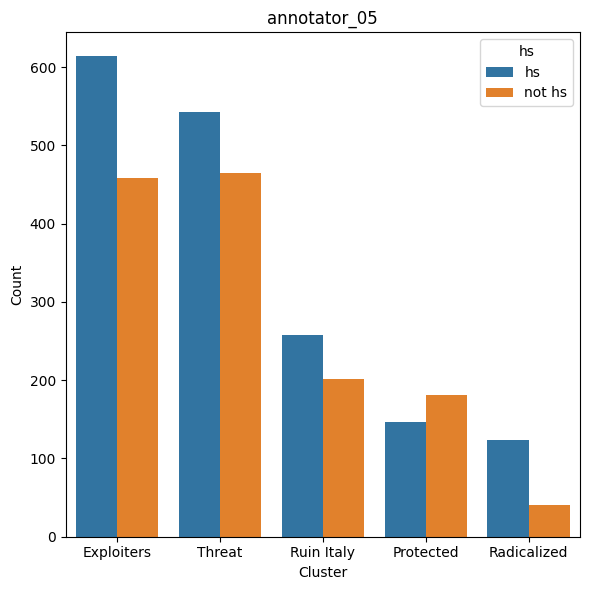

In [96]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df_cluster_en, x='cluster_5_nome_marem', hue='hs')

plt.title('annotator_05')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='hs')
plt.tight_layout()
plt.savefig("./saved_for_analysis/hs_a5.png")
plt.show()


/tmp/ipykernel_6806/3954009508.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
/tmp/ipykernel_6806/3954009508.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
/tmp/ipykernel_6806/3954009508.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)


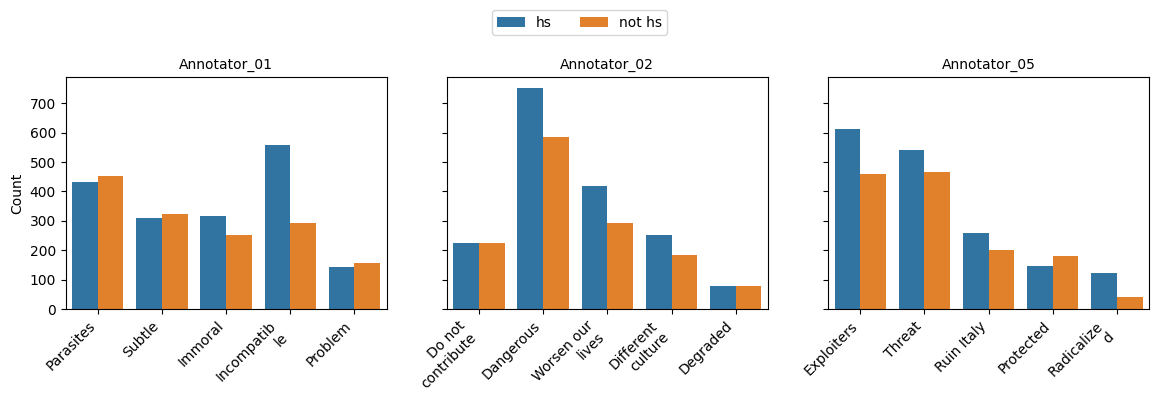

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# A4 landscape: width x height in inches
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11.69, 4), sharey=True)

# Custom function
def countplot_wrapped(ax, x_column, title, show_ylabel=False):
    sns.countplot(data=df_cluster_en, x=x_column, hue='hs', ax=ax)
    labels = [textwrap.fill(label.get_text(), width=10) for label in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
    ax.set_title(title, fontsize=10)
    
    if show_ylabel:
        ax.set_ylabel('Count', fontsize=10)
    else:
        ax.set_ylabel('')

    ax.set_xlabel('')

    # Reduce y-tick label font size
    ax.tick_params(axis='y', labelsize=10)

# Generate each plot
countplot_wrapped(axes[0], 'cluster_5_nome_marco', 'Annotator_01', show_ylabel=True)
countplot_wrapped(axes[1], 'cluster_5_nome_ale', 'Annotator_02')
countplot_wrapped(axes[2], 'cluster_5_nome_marem', 'Annotator_05')

# Shared legend at top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=len(labels),
           bbox_to_anchor=(0.5, 1.05), fontsize=10, title_fontsize=9)
for ax in axes:
    ax.legend().remove()

# Shared x-axis label
# fig.text(0.5, 0.02, 'Cluster', ha='center', fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("./saved_for_analysis/hs_all_horizontal_clean.png", dpi=300, bbox_inches='tight')
plt.show()


# Experiment analysis

In [20]:
run_1 = pd.read_csv("./output/parsed_output_1.csv")
run_2 = pd.read_csv("./output/parsed_output_2.csv")
run_3 = pd.read_csv("./output/parsed_output_3.csv")
run_4 = pd.read_csv("./output/parsed_output_4.csv")
run_5 = pd.read_csv("./output/parsed_output_5.csv")

print(run_1.shape, run_2.shape, run_3.shape, run_4.shape, run_5.shape)

(2148, 8) (2073, 8) (1999, 8) (2121, 8) (2076, 8)


In [21]:
def task_comparison (df1, df2, df3, df4, df5):
    df1_ = df1.rename(columns={"parsed_output":"parsed_run_1", "label": "label_run_1"})
    df2_ = df2.rename(columns={"parsed_output":"parsed_run_2", "label": "label_run_2"})
    df3_ = df3.rename(columns={"parsed_output":"parsed_run_3", "label": "label_run_3"})
    df4_ = df4.rename(columns={"parsed_output":"parsed_run_4", "label": "label_run_4"})
    df5_ = df5.rename(columns={"parsed_output":"parsed_run_5", "label": "label_run_5"})
    
    df_comparison_ = df1_[['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale', "parsed_run_1", 'label_run_1']]
    
    df_comparison_ = df_comparison_.merge(df2_[['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale', "parsed_run_2", "label_run_2"]], on=['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale'])
    df_comparison_ = df_comparison_.merge(df3_[['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale', "parsed_run_3", "label_run_3"]], on=['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale'])
    df_comparison_ = df_comparison_.merge(df4_[['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale', "parsed_run_4", "label_run_4"]], on=['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale'])
    df_comparison = df_comparison_.merge(df5_[['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale', "parsed_run_5", "label_run_5"]], on=['id', 'cleaned_cl_marem', 'cleaned_cl_marco','cleaned_cl_ale'])

    print(df_comparison.shape)

    return df_comparison


def task_agreements(df):
    # Check if all tasks agree on the label
    task_cols = ["label_run_1", "label_run_2", "label_run_3", "label_run_4", "label_run_5"]
    df["All_agree"] = df[task_cols].eq(df["label_run_1"], axis=0).all(axis=1)

    print("Result explanation (All_agree):")
    print("# True  - All tasks gave the same label")
    print("# False - At least one task gave a different label\n")
    print(df["All_agree"].value_counts())

    print("\n\n")

    df_agreed = df.copy()
    df_agreed = df_agreed[df_agreed["All_agree"] == True]

In [22]:
df_runs_all = task_comparison(run_1, run_2, run_3, run_4, run_5)

(1781, 14)


In [23]:
task_agreements(df_runs_all)

Result explanation (All_agree):
# True  - All tasks gave the same label
# False - At least one task gave a different label

All_agree
False    1363
True      418
Name: count, dtype: int64





In [24]:
df_agreement = df_runs_all[df_runs_all["All_agree"] == True]
df_disagreement = df_runs_all[df_runs_all["All_agree"] == False]

In [25]:
df_agreement["label_run_1"].value_counts()

label_run_1
marem    326
ale       86
marco      6
Name: count, dtype: int64

In [26]:
df_agreement["parsed_run_1"].value_counts()

parsed_run_1
Sono degli sfruttatori                    202
Sono tutelati                              85
Sono pericolosi                            75
Sono una minaccia                          27
Sono degli estremisti religiosi            12
Hanno una cultura diversa dalla nostra     11
Sono subdoli                                3
Sono incompatibili con noi                  2
Sono un problema                            1
Name: count, dtype: int64

In [31]:
list_runs = ["label_run_1", "label_run_2", "label_run_3", "label_run_4", "label_run_5"]

for run in list_runs:
    print(df_disagreement[run].value_counts())
    print()

label_run_1
marco    797
marem    414
ale      152
Name: count, dtype: int64

label_run_2
marem    822
ale      500
marco     41
Name: count, dtype: int64

label_run_3
marco    780
marem    461
ale      122
Name: count, dtype: int64

label_run_4
ale      866
marem    352
marco    145
Name: count, dtype: int64

label_run_5
marem    855
ale      449
marco     59
Name: count, dtype: int64

